All models have **ONE** output. In this case the models try to predict HC. 

Before moving to the hyper-parameter search, different architectures will be tested to understand if the size of the networks has a significant impact on performance. 

All models use the same hyper-parameters:

* Activation: ReLU
* Loss: MSE
* Optimizer: Adadelta
* Epochs: 300
* Dropout: 15%
* Batch-size: 64

In [2]:
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Dropout, advanced_activations, BatchNormalization, LeakyReLU, PReLU
from keras import losses, optimizers, activations
import keras.backend as K

import h5py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score
from sklearn.utils import shuffle

from scipy import stats
import time
import datetime
import os

C:\Users\drllc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Data

In [3]:
# This data was scaled using MinMax
data_scaled_shuffled = pd.read_csv('Dataset_Scaled_Shuffled.csv')
print('Shuffled dataset loaded.')

Shuffled dataset loaded.


## Prepare Data

In [4]:
# Get number of data points
data_points = data_scaled_shuffled.shape[0]

# Set sizes for train, dev, test sets
train_percent = 0.8
train_size = round(train_percent*data_points)

if (data_points-train_size)%2 == 0:
    dev_size = int((data_points-train_size)/2)
    test_size = dev_size
    print('Train Size = {}'.format(train_size))
    print('Dev Size = {}'.format(dev_size))
    print('Test Size = {}'.format(test_size))
    print('Remainder = {}'.format(train_size+dev_size+test_size-data_points))
    
else:
    train_size = train_size-1
    dev_size = int((data_points-train_size)/2)
    test_size = dev_size 
    print('Train Size = {}'.format(train_size))
    print('Dev Size = {}'.format(dev_size))
    print('Test Size = {}'.format(test_size))
    print('Remainder = {}'.format(train_size+dev_size+test_size-data_points))

Train Size = 62511
Dev Size = 7814
Test Size = 7814
Remainder = 0


In [5]:
# Divide data into train, dev, and test sets
train_set = data_scaled_shuffled[:train_size]
dev_set = data_scaled_shuffled[train_size:train_size+dev_size]
test_set = data_scaled_shuffled[train_size+dev_size:train_size+dev_size+test_size]

# Reset index for all sets
train_set = train_set.reset_index(drop=True)
dev_set = dev_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# Get values
train_set_values = train_set.values
dev_set_values = dev_set.values
test_set_values = test_set.values

# Number of emissions: HC, CO, CO2, NOX
n_out = 4

# SLICING: [start row:end row , start column:end column]
# Split into inputs and outputs
x_train = train_set_values[:,:-n_out]
x_dev = dev_set_values[:,:-n_out]
x_test = test_set_values[:,:-n_out]

HC_train = train_set_values[:,-n_out]
#CO_train = train_set_values[:,-n_out+1]
#CO2_train = train_set_values[:,-n_out+2]
#NOX_train = train_set_values[:,-n_out+3]

y_train = HC_train

HC_dev = dev_set_values[:,-n_out]
#CO_dev = dev_set_values[:,-n_out+1]
#CO2_dev = dev_set_values[:,-n_out+2]
#NOX_dev = dev_set_values[:,-n_out+3]

y_dev = HC_dev

HC_test = test_set_values[:,-n_out]
#CO_test = test_set_values[:,-n_out+1]
#CO2_test = test_set_values[:,-n_out+2]
#NOX_test = test_set_values[:,-n_out+3]

y_test = HC_test

In [40]:
# Mini-batch size, epochs, dropout
batch_size = 64
epochs = 300
dd = 0.15

# Activation, loss, optimizer
loss_func = losses.mean_squared_error
opti = optimizers.Adadelta()

In [41]:
def activation_function():
    function = advanced_activations.PReLU()
    return function

In [42]:
def create_model(number):
    
    if number == 1:
        # Create model
        model = Sequential()

        model.add(Dense(256, input_dim=x_train.shape[1]))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(128))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(64))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(32))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(16))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(1))

        #Compile model
        model.compile(loss=loss_func, optimizer=opti, metrics = ['accuracy'])
        model.summary()
        
    if number == 2:
        # Create model
        model = Sequential()

        model.add(Dense(128, input_dim=x_train.shape[1]))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(64))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(32))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(16))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(1))

        #Compile model
        model.compile(loss=loss_func, optimizer=opti, metrics = ['accuracy'])
        model.summary()
        
    if number == 3:
        # Create model
        model = Sequential()

        model.add(Dense(64, input_dim=x_train.shape[1]))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(32))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(16))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(1))

        #Compile model
        model.compile(loss=loss_func, optimizer=opti, metrics = ['accuracy'])
        model.summary()
        
    if number == 4:
        # Create model
        model = Sequential()

        model.add(Dense(128, input_dim=x_train.shape[1]))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(512))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(256))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(128))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(64))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())
        
        model.add(Dense(32))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())
        
        model.add(Dense(16))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(1))

        #Compile model
        model.compile(loss=loss_func, optimizer=opti, metrics = ['accuracy'])
        model.summary()
        
    if number == 5:
        # Create model
        model = Sequential()

        model.add(Dense(512, input_dim=x_train.shape[1]))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(256))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(128))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(64))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())
        
        model.add(Dense(32))
        model.add(activation_function())
        model.add(Dropout(dd))
        model.add(BatchNormalization())

        model.add(Dense(1))

        #Compile model
        model.compile(loss=loss_func, optimizer=opti, metrics = ['accuracy'])
        model.summary()
        
    return model

In [23]:
model_1 = create_model(1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               4864      
_________________________________________________________________
p_re_lu_16 (PReLU)           (None, 256)               256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
p_re_lu_17 (PReLU)           (None, 128)               128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
__________

In [24]:
model_2 = create_model(2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               2432      
_________________________________________________________________
p_re_lu_21 (PReLU)           (None, 128)               128       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
p_re_lu_22 (PReLU)           (None, 64)                64        
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
__________

In [25]:
model_3 = create_model(3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                1216      
_________________________________________________________________
p_re_lu_25 (PReLU)           (None, 64)                64        
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 64)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
p_re_lu_26 (PReLU)           (None, 32)                32        
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
__________

In [26]:
model_4 = create_model(4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               2432      
_________________________________________________________________
p_re_lu_28 (PReLU)           (None, 128)               128       
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 128)               512       
_________________________________________________________________
dense_35 (Dense)             (None, 512)               66048     
_________________________________________________________________
p_re_lu_29 (PReLU)           (None, 512)               512       
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
__________

In [44]:
def train_models(number):
    
    if number == 1:
        model = model_1
        
    if number == 2:
        model = model_2
        
    if number == 3:
        model = model_3
        
    if number == 4: 
        model = model_4
    
    if number == 5: 
        model = model_5
    
    print('Training Started - Model {}'.format(number))
    print('Optimizer: {}'.format(model.optimizer))
    print(datetime.datetime.now())
    # Start timer
    start_time = time.time()

    # fit network
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(x_dev, y_dev), verbose=0, shuffle=True)

    # End timer
    end_time = time.time() - start_time
    print('Training Complete')
    print('Time: {:.3f} s'.format(end_time))
    print('Time: {:.3f} min'.format(end_time/60))
    print('----------------------------------')
        
    return history

In [29]:
history_1 = train_models(1)
history_2 = train_models(2)
history_3 = train_models(3)
history_4 = train_models(4)

Training Started - Model 1
Optimizer: <keras.optimizers.Adadelta object at 0x000001EEE7E89198>
2019-03-23 10:41:09.069743
Training Complete
Time: 2880.922 s
Time: 48.015 min
----------------------------------
Training Started - Model 2
Optimizer: <keras.optimizers.Adadelta object at 0x000001EEE7E89198>
2019-03-23 11:29:09.992461
Training Complete
Time: 2383.667 s
Time: 39.728 min
----------------------------------
Training Started - Model 3
Optimizer: <keras.optimizers.Adadelta object at 0x000001EEE7E89198>
2019-03-23 12:08:53.660213
Training Complete
Time: 1922.067 s
Time: 32.034 min
----------------------------------
Training Started - Model 4
Optimizer: <keras.optimizers.Adadelta object at 0x000001EEE7E89198>
2019-03-23 12:40:55.727457
Training Complete
Time: 3833.616 s
Time: 63.894 min
----------------------------------


In [45]:
# Create epoch vector
epoch_vector = np.linspace(1,epochs,epochs)

def graph_history(number):
    
    if number == 1:
        history = history_1
        
    if number == 2:
        history = history_2
        
    if number == 3:
        history = history_3
        
    if number == 4: 
        history = history_4
        
    if number == 5: 
        history = history_5
        
    # plot main loss
    plt.figure(figsize=(12,7))
    plt.plot(epoch_vector, history.history['loss'], label='Train')
    plt.plot(epoch_vector, history.history['val_loss'], 'r', label='Validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim((0,0.005))
    plt.legend() 
    plt.grid()

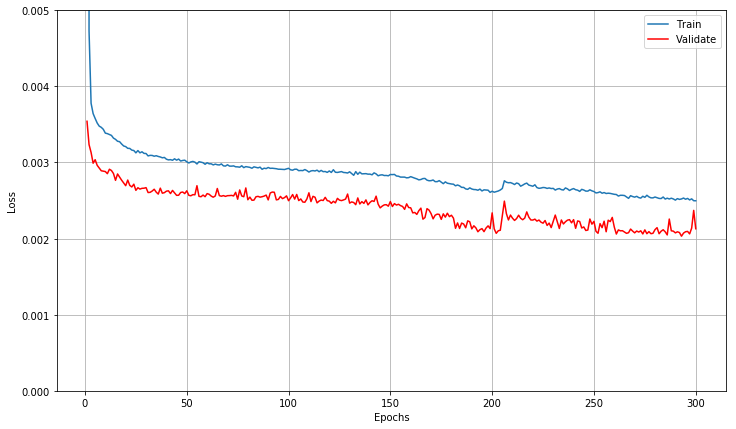

In [31]:
graph_history(1)

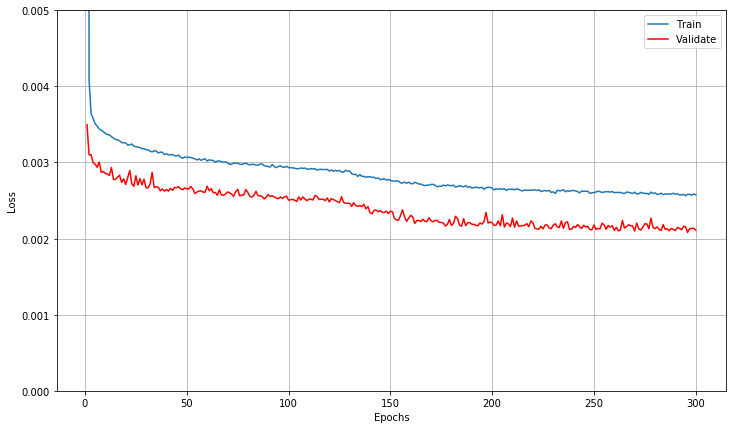

In [32]:
graph_history(2)

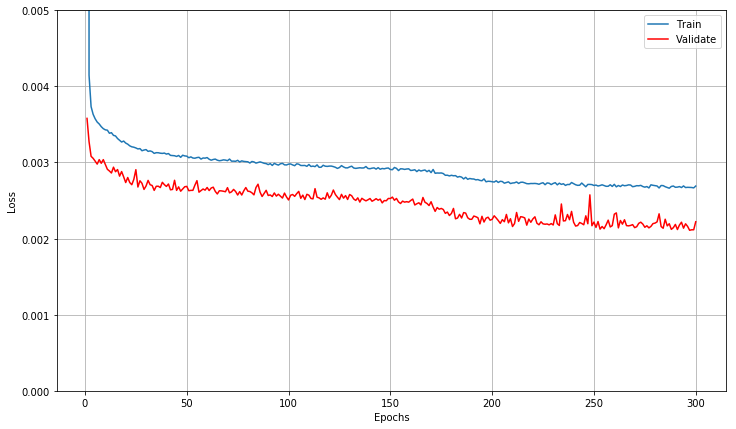

In [33]:
graph_history(3)

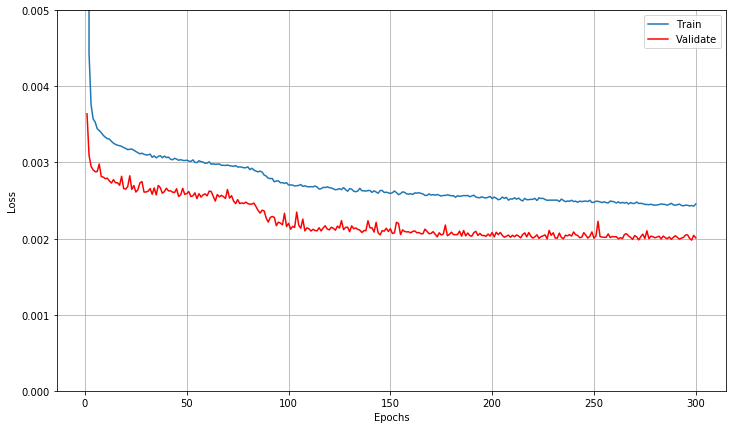

In [34]:
graph_history(4)

In [48]:
print(history_1.history['val_loss'][-1])
print(history_2.history['val_loss'][-1])
print(history_3.history['val_loss'][-1])
print(history_4.history['val_loss'][-1])
print(history_5.history['val_loss'][-1])

0.0021293569291365674
0.002110878383265944
0.002221245125330849
0.002008888933467692
0.002154627445351503


In [43]:
model_5 = create_model(5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               9728      
_________________________________________________________________
p_re_lu_40 (PReLU)           (None, 512)               512       
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)               2048      
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
p_re_lu_41 (PReLU)           (None, 256)               256       
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
__________

In [46]:
history_5 = train_models(5)

Training Started - Model 5
Optimizer: <keras.optimizers.Adadelta object at 0x000001EEFE196E80>
2019-03-23 14:05:56.008078
Training Complete
Time: 2880.442 s
Time: 48.007 min
----------------------------------


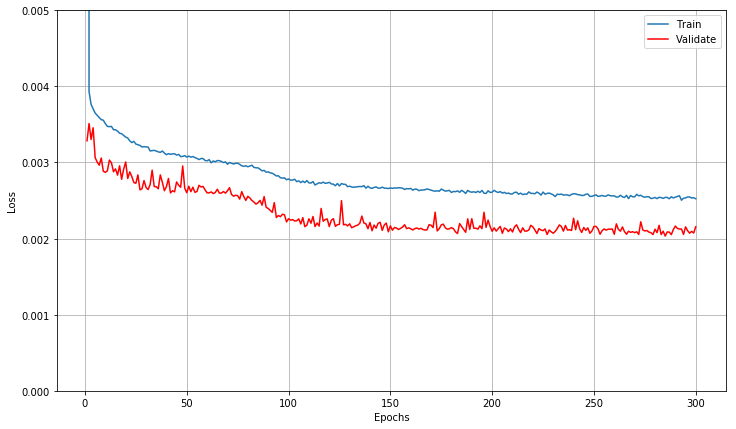

In [47]:
graph_history(5)

### Results:

The error is so high that impact on performance is minimal across models. Because of this, a middle ground architecture will be used for the rest of the project. 

input - 256 - 128 - 64 - 32 - 16 - 1 (output)

If errors are somehow reduced in future models, a new network size test can be carried out to see if erros can be further reduced.